In [68]:
import matplotlib.pyplot as plt
import pandas as pd

## Data preparation
This section involves cleaning and transforming the raw data for further analysis, ensuring its readiness for visualization and interpretation.

### 1.1. Read data
Load the dataset from a CSV file, remove irrelevant columns, and prepare the data structure for parsing.

In [69]:
data = pd.read_csv("../data/vacancies.csv")
del data["employment_type"]
del data["url"]

### 1.2. Parse data
Transform specific fields into structured formats using custom parsing functions, enabling better analysis and computation.

In [70]:
from collections import Counter


def parse_experience(experience: str) -> tuple[int | None, int | None]:
    if pd.isna(experience):
        return None, None
    
    if "<" in experience:
        return 0, int(experience[1:])
    elif "+" in experience:
        return int(experience[:-1]), None
    elif "-" in experience:
        from_exp, to_exp = experience.split("-")
        return int(from_exp), int(to_exp)
    
    return None, None


def parse_salary(salary: str) -> tuple[float | None, float | None]:
    if pd.isna(salary):
        return None, None
    
    if "<" in salary:
        return 0, float(salary[1:])
    elif ">" in salary:
        return float(salary[1:]), None
    elif "-" in salary:
        from_slr, to_slr = salary.split("-")
        return float(from_slr), float(to_slr)
    
    return None, None


data["required_experience"] = (
    data["required_experience"].astype(str).apply(parse_experience)
)
data["salary_range"] = data["salary_range"].astype(str).apply(parse_salary)

all_tech = [
    tech
    for tech_list in data["technologies"].dropna()
    for tech in tech_list.split(",")
]
top_tech = Counter(all_tech).most_common(15)

location_counts = (
    data["locations"]
    .apply(lambda loc: loc.split(","))
    .explode()
    .value_counts()
    .head(15)
)

top_10_companies = data["company"].value_counts().head(10)

## 2. Data analysis
This section provides a detailed exploration of key trends and insights in the data, including popular technologies, hiring companies, and job location distribution.

### 2.1. Top 15 technologies
Visualizes the 15 most frequently mentioned technologies in job postings. A horizontal bar chart highlights their relative popularity, aiding in identifying key technical skills in demand.

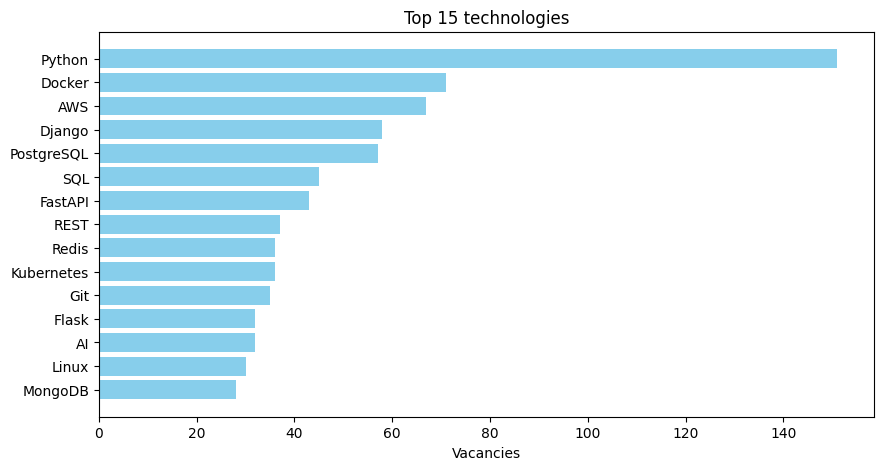

In [71]:
tech_names, tech_counts = zip(*top_tech)

plt.figure(figsize=(10, 5))
plt.barh(tech_names, tech_counts, color="skyblue")
plt.xlabel("Vacancies")
plt.title("Top 15 technologies")
plt.gca().invert_yaxis()
plt.show()

### 2.2. Top 10 hiring companies
Displays the 10 companies with the highest number of job postings. This bar chart provides insight into major employers in the market and their recruitment trends.

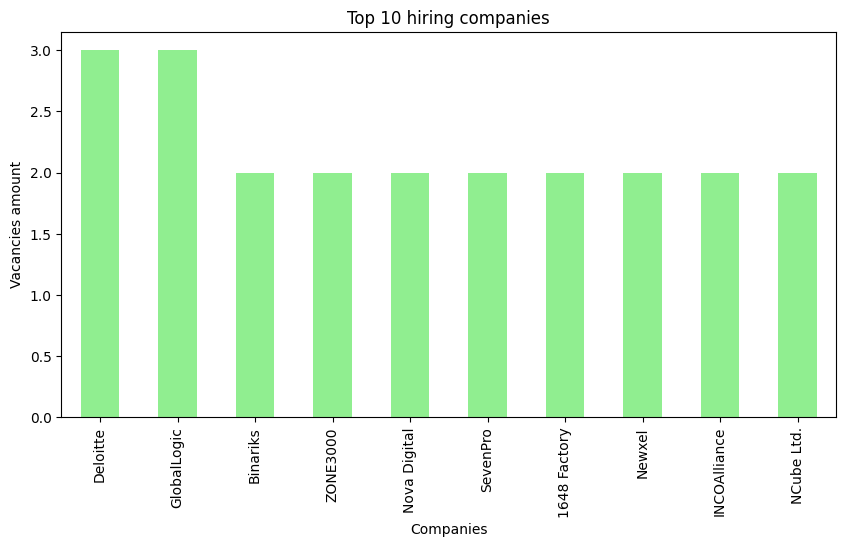

In [72]:
plt.figure(figsize=(10, 5))
top_10_companies.plot(kind="bar", color="lightgreen")
plt.title("Top 10 hiring companies")
plt.xlabel("Companies")
plt.ylabel("Vacancies amount")
plt.show()

### 2.3. Vacancies distributed by locations
Analyzes the geographic distribution of job postings. A pie chart with an adjacent legend details the percentage share of the top 15 locations, revealing key employment hubs.

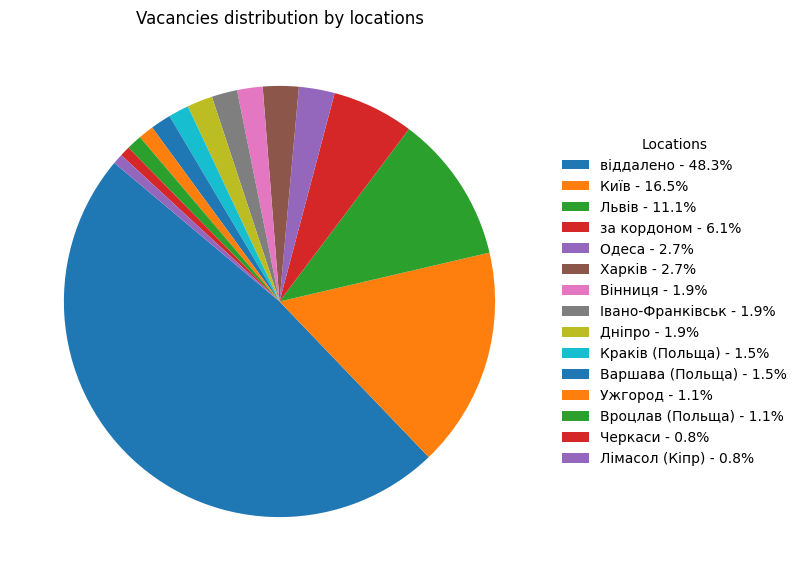

In [73]:
fig, ax = plt.subplots(figsize=(12, 7))
wedges, texts = ax.pie(location_counts, labels=None, startangle=140)
legend_labels = [
    f"{loc} - {pct:.1f}%"
    for loc, pct in zip(
        location_counts.index,
        (location_counts / location_counts.sum()) * 100
    )
]
ax.legend(
    wedges,
    legend_labels,
    title="Locations",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
ax.set_title("Vacancies distribution by locations")
plt.show()

### 2.4. Distribution of vacancies by required experience
This chart illustrates the distribution of job postings based on the required experience level.

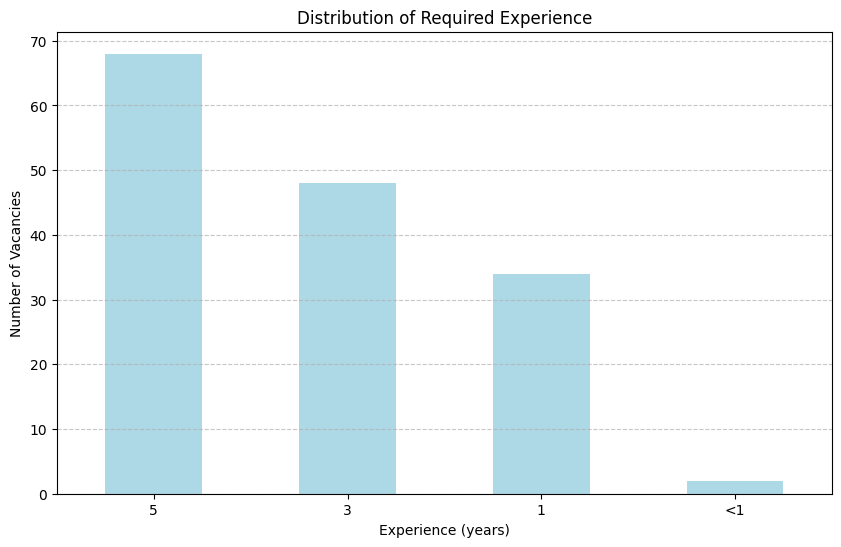

In [74]:
def map_experience(exp: tuple[int | None, int | None]) -> str:
    from_exp, to_exp = exp
    if from_exp == 0 and (to_exp is not None and to_exp <= 1):
        return "<1"
    elif from_exp is not None:
        return str(from_exp)
    return "Unknown"


experience_counts = (
    data["required_experience"].apply(map_experience).value_counts()
)

plt.figure(figsize=(10, 6))
experience_counts.plot(kind="bar", color="lightblue")
plt.title("Distribution of Required Experience")
plt.xlabel("Experience (years)")
plt.ylabel("Number of Vacancies")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()